## Same thing but Poisson

In [12]:
# %matplotlib widget
import numpy as np
from functools import partial
import matplotlib.pyplot as plt
from matplotlib import cm
from tqdm import tqdm
np.random.seed(42)

In [28]:
K = 10
a, b = 0.1, 1.3
N_train = 80
N_test = 20
var = 0.5

In [29]:
theta_true = np.ones(K)
X_train = np.linspace(a, b, N_train)
X_test = np.random.uniform(a, b, N_test)
print("X_train shape :{}, X_test shape :{}".format(X_train.shape, X_test.shape))

X_train shape :(80,), X_test shape :(20,)


In [30]:
def generalized_vandermonde_matrix(func_list, X):
    K = len(func_list)
    N = len(X)
    matrix = np.zeros((N, K))
    for i, func in enumerate(func_list):
        matrix[:, i] = func(x=X)
    return matrix

def phi(j, x):
    return np.power(x, j)

def get_normal_vandermonde(K, X):
    vander = generalized_vandermonde_matrix(
        func_list=[partial(phi, j=j) for j in range(K)],
        X=X
    )
    return vander

In [31]:
def get_true_Y(K, X, theta_true, var):
    vander = get_normal_vandermonde(K, X)
    return np.random.poisson(vander @ theta_true)

Y_train = get_true_Y(K, X_train, theta_true, var)
Y_test = get_true_Y(K, X_test, theta_true, var)

print("Y_train shape :{}, Y_test shape :{}".format(Y_train.shape, Y_test.shape))

Y_train shape :(80,), Y_test shape :(20,)


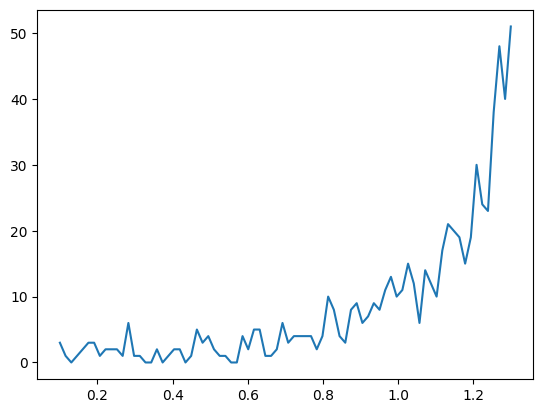

In [32]:
plt.plot(X_train, Y_train)

If $Poi(y|\lambda)=\frac{\lambda^y e^{-\lambda}}{y!}$ for one sample, then the negative log likelyhood is $L(\lambda) = \sum_i^N [-y_i\log{\lambda} + \lambda + \log{(y_i!)}]$, but $\lambda$ in our case was defined as $\Phi(X) \theta$, where $\Phi$ is the vandermonde matrix associated with X and $\theta$ are the parameters of our regressor

Unfortunately, there is no closed form solution for $\frac{\partial L}{\partial}$

And when you put the derivative=0 to find the minimum, you find: $N-\frac{1}{\lambda} \sum_i^N y_i=0$, so $\lambda = \frac{1}{N} \sum_i^N y_i$

In our case, $\theta_{MLE} = \argmin_{\theta}{[-y\log{\Phi(X) \theta} + \Phi(X) \theta ]}$ --> $\Phi(X) \theta_{MLE} = \frac{1}{N} \sum_i^N y_i$

OSS --> lambda = expected value of Y (?) --> = to e^(Phi(x)*theta)